In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import matplotlib.dates as mdates

In [2]:
interim = pathlib.Path().cwd().parent.parent / 'data' / 'interim'

In [15]:
shdf = pd.read_csv(interim / 'public.csv')

In [8]:
shdf

,name_full,sex,yob,addr_dist_home,date_report,date_positive
0,TRẦN NGỌC BÙI,NAM,1994.0,QA08,2021-06-11,2021-06-10
1,TRẦN LÊ NHỰT DUY,NAM,2009.0,QBCH,2021-06-10,2021-06-09
2,TRẦN VĂN HÓA,NAM,1959.0,QBCH,2021-06-10,2021-06-09
3,ĐOÀN THỊ KIM ANH,NỮ,1956.0,QBCH,2021-06-10,2021-06-09
4,LÂM TRẦN BẢO NGỌC,NỮ,2014.0,QBCH,2021-06-10,2021-06-09
...,...,...,...,...,...,...
15243,QUỐC THỊ THU SƯƠNG,NỮ,1967.0,UNKN,2021-07-10,2021-07-08
15244,QUỐC THỊ THU THỦY,NỮ,1969.0,UNKN,2021-07-10,2021-07-08
15245,MAI THỊ LUYỆN,NỮ,1970.0,QBCH,2021-07-10,2021-07-10
15246,TĂNG ĐỨC TRỌNG,NAM,1976.0,QA08,2021-07-10,2021-07-10


In [16]:
shdf.date_report = pd.to_datetime(shdf.date_report, format='%Y-%m-%d', errors='coerce')
# shdf.date_positive = pd.to_datetime(shdf.date_positive, format='%Y-%m-%d')
shdf = shdf[(shdf.sex == 'NAM') | (shdf.sex == 'NỮ')]
shdf = shdf.replace(['NAM', 'NỮ'], ['MALE', 'FEMALE'])

In [17]:
inc = (shdf[['date_report']]
       .groupby(['date_report'])
       .apply(lambda x: len(x))
       .to_frame(name='case'))
        
inc['case_rm'] = inc.rolling(7).mean() 

inc_addr_dist_home = (shdf[['date_report', 'addr_dist_home']]
                 .groupby(['date_report', 'addr_dist_home'])
                 .apply(lambda x: len(x))
                 .to_frame(name='case')
                 .unstack(fill_value=0)
                 .asfreq('D', fill_value=0)
                 .stack()
                 .sort_index(level=0)
                 .reset_index(1)
                )


inc_addr_dist_home['case_rm'] = inc_addr_dist_home.groupby('addr_dist_home')['case'].transform(lambda x: x.rolling(7).mean())
inc_addr_dist_home = inc_addr_dist_home.reset_index(0)

In [12]:
# inc_addr_dist_home.value_counts('addr_dist_home')

In [18]:
inc.case

date_report
2021-05-07       1
2021-05-27      36
2021-05-28      31
2021-05-29      43
2021-05-30      63
2021-05-31      32
2021-06-01      56
2021-06-02      15
2021-06-03      56
2021-06-04      25
2021-06-05      29
2021-06-06      42
2021-06-07     244
2021-06-08      16
2021-06-09      96
2021-06-10      55
2021-06-11     106
2021-06-12     109
2021-06-13      45
2021-06-14     139
2021-06-15     147
2021-06-16     128
2021-06-17     151
2021-06-18      81
2021-06-19     123
2021-06-20     191
2021-06-21     169
2021-06-22      93
2021-06-23     143
2021-06-24     669
2021-06-25     239
2021-06-26     438
2021-06-27     321
2021-06-28     188
2021-06-29     416
2021-06-30     315
2021-07-01     586
2021-07-02     598
2021-07-03     522
2021-07-04     442
2021-07-05     618
2021-07-06    1133
2021-07-07    1353
2021-07-08    1486
2021-07-09    1811
2021-07-10    1321
2021-07-22       1
2021-07-23       1
2021-08-22       1
2021-08-23       1
2021-09-10       1
2021-09-22       1


In [19]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 180, y[i], ha='center', va='top', rotation=90)
        

fig, ax = plt.subplots(figsize=(10, 6))
# sns.histplot(x='inc.case', data = df_iris, bins=10)
ax.bar(inc.index, inc.case, label='Số ca mới theo ngày', linewidth=3)
ax.plot(inc.index, inc.case_rm, label='Biến động trung bình 7 ngày', linewidth=3)
ax.set_ylabel('Số ca mới')
ax.set_xlabel('Ngày')
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Số ca mới theo ngày và biến động trung bình 7 ngày')
ax.legend()
# inc = inc.reset_index()
# baz = pd.melt(inc, ['date_report'])
# baz
addlabels(inc.index, inc.case)


ValueError: Image size of 180918x437 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x432 with 1 Axes>

In [52]:
# g = sns.lineplot(data=baz, x='date_report', y='value', hue='variable')

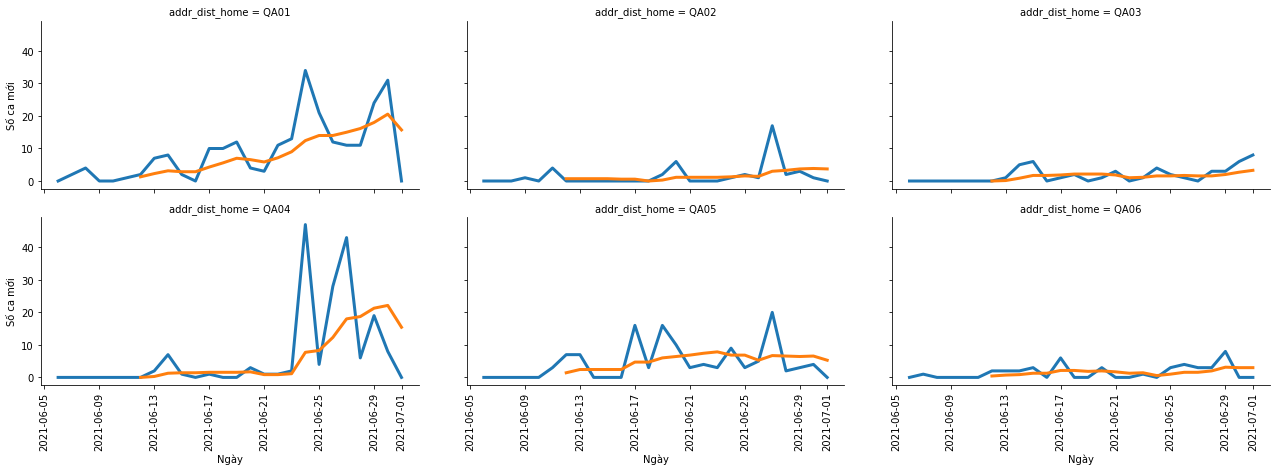

In [53]:
# g = sns.FacetGrid(
#         inc_addr_dist_home.query('addr_dist_home in ["QA01", "QA02", "QA03", "QA04", "QA05", "QA06"]'),
#         col="addr_dist_home", 
#         col_wrap=3,
#         height=3,
#         aspect=3)
# g.map(sns.lineplot, 'date_report', "case")
# g.map(sns.lineplot, 'date_report', "case_rm", color='orange')
# g.set_xticklabels(rotation=90)
# g.set_axis_labels("Ngày", "Số ca mới")

# foo = (pd.melt(inc_addr_dist_home, ['date_report','addr_dist_home'])
#          .query('addr_dist_home in ["QA01", "QA02", "QA03", "QA04", "QA05", "QA06"]'))

g = sns.FacetGrid(
        (pd.melt(inc_addr_dist_home, ['date_report','addr_dist_home'])
         .query('addr_dist_home in ["QA01", "QA02", "QA03", "QA04", "QA05", "QA06"]')),
        col="addr_dist_home", 
        col_wrap=3,
        height=3,
        aspect=2)
g.map(sns.lineplot, 'date_report', 'value', 'variable', linewidth=3)
g.set_xticklabels(rotation=90)
g.set_axis_labels("Ngày", "Số ca mới")

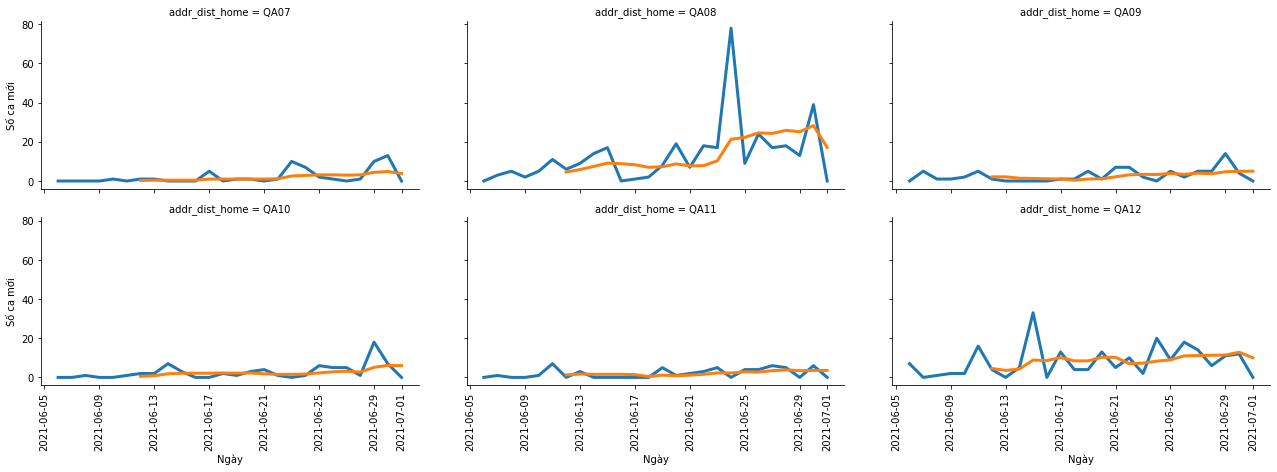

In [54]:
g = sns.FacetGrid(
        (pd.melt(inc_addr_dist_home, ['date_report','addr_dist_home'])
         .query('addr_dist_home in ["QA07", "QA08", "QA09", "QA10", "QA11", "QA12"]')),
        col="addr_dist_home", 
        col_wrap=3,
        height=3,
        aspect=2)
g.map(sns.lineplot, 'date_report', 'value', 'variable', linewidth=3)
g.set_xticklabels(rotation=90)
g.set_axis_labels("Ngày", "Số ca mới")

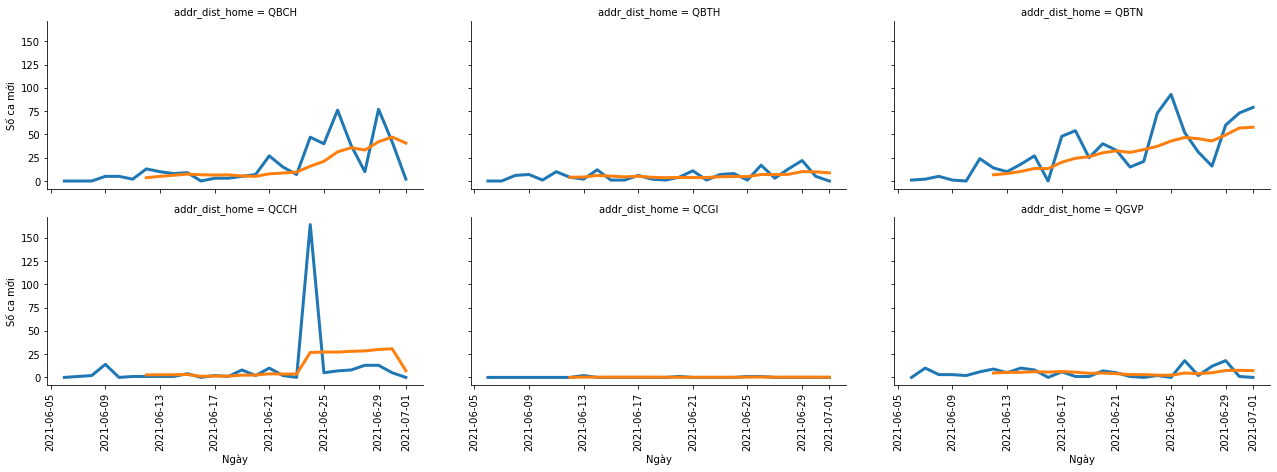

In [55]:
g = sns.FacetGrid(
        (pd.melt(inc_addr_dist_home, ['date_report','addr_dist_home'])
         .query('addr_dist_home in ["QBTN", "QBTH", "QBCH", "QCGI", "QCCH", "QGVP"]')),
        col="addr_dist_home", 
        col_wrap=3,
        height=3,
        aspect=2)
g.map(sns.lineplot, 'date_report', 'value', 'variable', linewidth=3)
g.set_xticklabels(rotation=90)
g.set_axis_labels("Ngày", "Số ca mới")


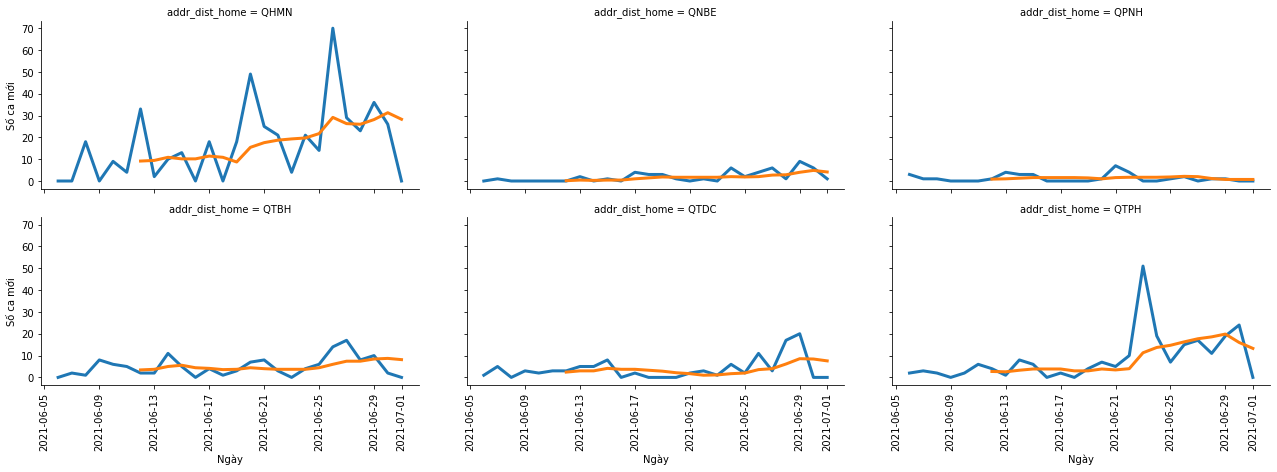

In [56]:
g = sns.FacetGrid(
        (pd.melt(inc_addr_dist_home, ['date_report','addr_dist_home'])
         .query('addr_dist_home in ["QHMN", "QNBE", "QPNH", "QTBH", "QTPH", "QTDC"]')),
        col="addr_dist_home", 
        col_wrap=3,
        height=3,
        aspect=2)
g.map(sns.lineplot, 'date_report', 'value', 'variable', linewidth=3)
g.set_xticklabels(rotation=90)
g.set_axis_labels("Ngày", "Số ca mới")

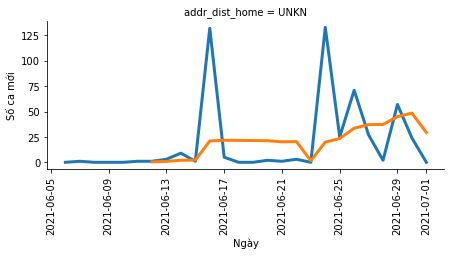

In [57]:
g = sns.FacetGrid(
        (pd.melt(inc_addr_dist_home, ['date_report','addr_dist_home'])
         .query('addr_dist_home in ["UNKN"]')),
        col="addr_dist_home", 
        col_wrap=3,
        height=3,
        aspect=2)
g.map(sns.lineplot, 'date_report', 'value', 'variable', linewidth=3)
g.set_xticklabels(rotation=90)
g.set_axis_labels("Ngày", "Số ca mới")